In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/cleaned_air_pollution_data.csv")

# Display dataset overview
print("Dataset Overview:")
print(df.info())

# Show first few rows
df.head()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             23463 non-null  object
 1   city                23463 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value        23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


,country,city,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [11]:
# Summary statistics of numeric columns
print(df.describe())

# Count missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check unique cities
print("\nCities in Dataset:", df['city'].unique())


          aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  \
count  23463.000000  23463.000000     23463.000000   23463.000000   
mean      72.010868      1.368367        35.193709       3.063334   
std       56.055220      1.832064        28.098723       5.254108   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       pm2.5_aqi_value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  

Missing Values:
 country               0
city                  0
aqi_value             0
aqi_category          0
co_aqi_value          0
co_aqi_category

In [12]:
city_avg_pollution = df.groupby("city")[["pm2.5_aqi_value", "no2_aqi_value", "co_aqi_value", "ozone_aqi_value"]].mean()

# Sort cities by PM2.5 AQI levels (most polluted to least)
city_avg_pollution = city_avg_pollution.sort_values(by="pm2.5_aqi_value", ascending=False)

# Display the first few rows
print(city_avg_pollution.head())

           pm2.5_aqi_value  no2_aqi_value  co_aqi_value  ozone_aqi_value
city                                                                    
Nilokheri            500.0            1.0           1.0             46.0
Boksburg             500.0           30.0          49.0              1.0
Churu                500.0            0.0           1.0             37.0
Hasanpur             500.0            1.0           1.0             55.0
Pilkhuwa             500.0            2.0           2.0             61.0


C:\Users\saksh\AppData\Local\Temp\ipykernel_20948\1896234009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities["pm2.5_aqi_value"], palette="Reds")


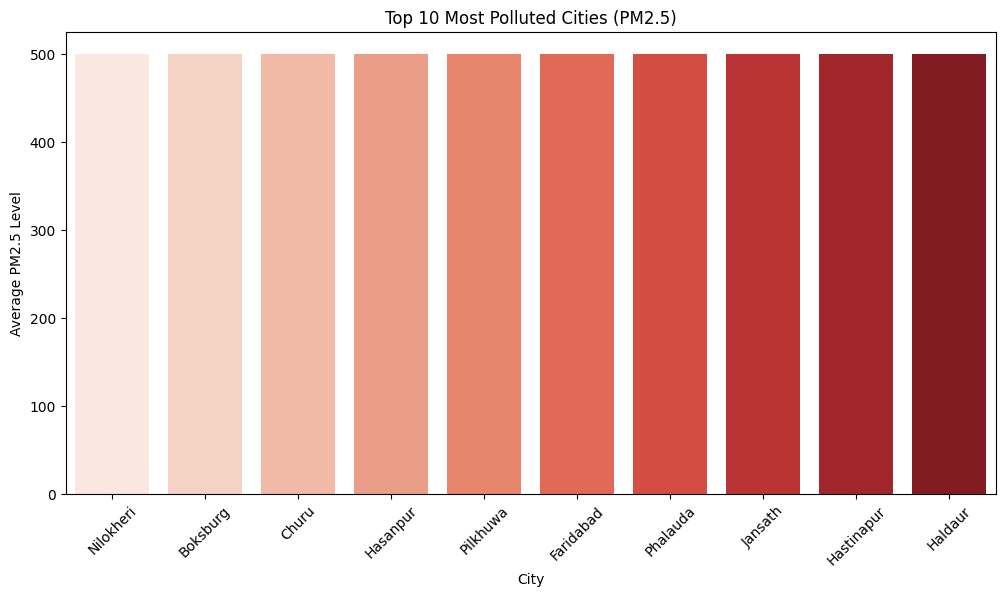

In [13]:
# Select top 10 most polluted cities based on PM2.5
top_cities = city_avg_pollution.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities["pm2.5_aqi_value"], palette="Reds")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Average PM2.5 Level")
plt.title("Top 10 Most Polluted Cities (PM2.5)")
plt.show()


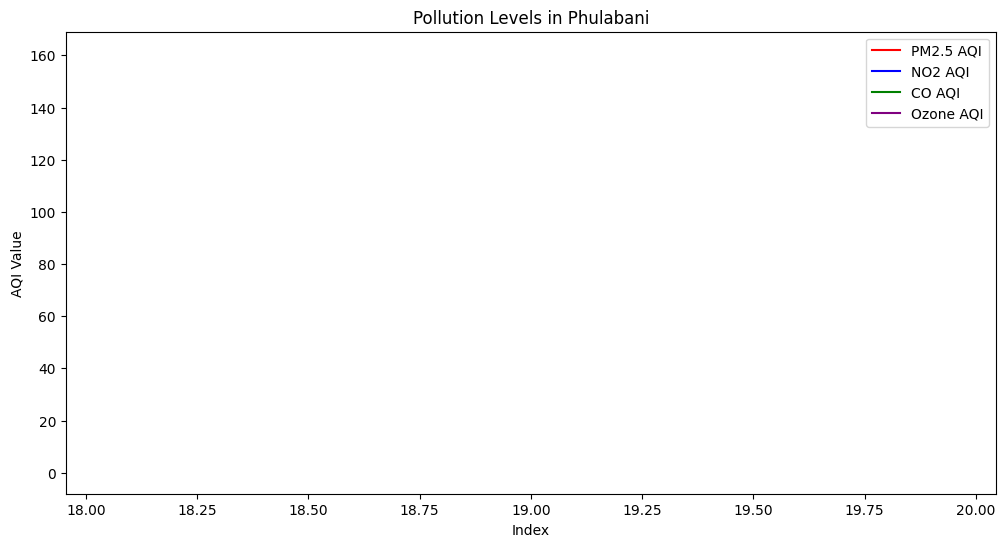

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for a specific city (e.g., Phulabani)
Phulabani_data = df[df["city"] == "Phulabani"]

# Plot AQI trends for PM2.5 and other pollutants
plt.figure(figsize=(12, 6))
sns.lineplot(data=Phulabani_data, y="pm2.5_aqi_value", x=Phulabani_data.index, label="PM2.5 AQI", color="red")
sns.lineplot(data=Phulabani_data, y="no2_aqi_value", x=Phulabani_data.index, label="NO2 AQI", color="blue")
sns.lineplot(data=Phulabani_data, y="co_aqi_value", x=Phulabani_data.index, label="CO AQI", color="green")
sns.lineplot(data=Phulabani_data, y="ozone_aqi_value", x=Phulabani_data.index, label="Ozone AQI", color="purple")

# Formatting the plot
plt.xlabel("Index")  # Since 'date' is removed, x-axis will use DataFrame index
plt.ylabel("AQI Value")
plt.title("Pollution Levels in Phulabani")
plt.legend()
plt.show()




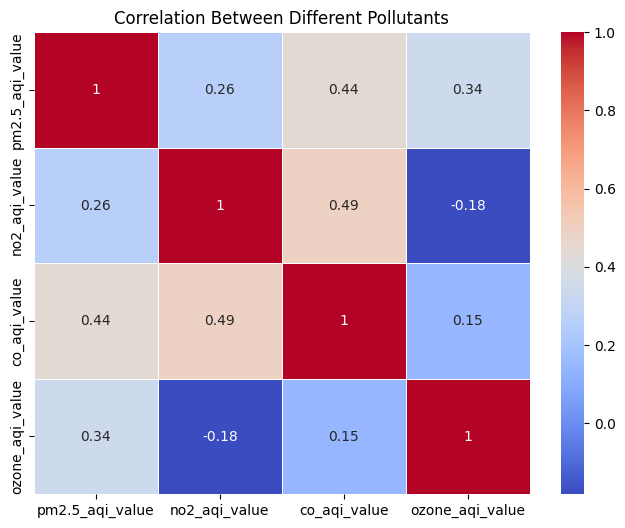

In [15]:
# Compute correlation matrix
corr_matrix = df[["pm2.5_aqi_value", "no2_aqi_value", "co_aqi_value", "ozone_aqi_value"]].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Different Pollutants")
plt.show()
